## Etude de machine learning

Exercice consistant à utiliser un dataset dans l'objectif d'entraîner différents algorithmes de machine learning.

Origine du dataset : kaggle.com
"cardiovascular-risk-factor-data" : To predict the 10-year risk of future coronary heart disease (CHD) in patients
https://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data

*"Variables Description

Demographic:

Sex: male or female ("M" or "F")
Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Education: The level of education of the patient (categorical values - 1,2,3,4)
Behavioral:

is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical (history):

BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)
Medical (current):

Tot Chol: total cholesterol level (Continuous)
Sys BP: systolic blood pressure (Continuous)
Dia BP: diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
Glucose: glucose level (Continuous)
Predict variable (desired target):

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)"*

***********************************************************

1ere partie - préparation
- import des librairies
- import du dataset et pré-processing
- datavisualisation rapide
- split

2e partie - classification
- LinearSVC
- KNeighbors Classifier
- SVC
- Randomforest Classifier

3e partie - conclusion

Pour chaque modèle utilisé, la méthode est toujours la même :
- création du modèle avec hyperparamètres par défaut
- score
- recherche des meilleurs hyperparamètres
- optimisation du modèle
- nouveau score
- matrice de confusion
- courbe d'apprentissage

## 1ere partie - préparation

In [1]:
# Import des librairies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing, svm, model_selection, neighbors, ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve, auc

Création du dataframe et pré-processing

In [2]:
df = pd.read_csv('data_cardiovascular_risk.csv', index_col='id')

In [3]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.isna().sum()

# Quelques variables ont des NaN.

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [6]:
df.nunique()

# On peut déceler quelles sont, à priori, les variables catégorielles par leur faible nombre de valeurs uniques.

age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [7]:
# Création de deux groupes de variables, catégorielles (nominal_col) et quantitatives (continuous_col) :

nominal_col = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

continuous_col = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Remplacement des NaN : pour les variables catégorielles, on utilisera la modalité la plus fréquente, pour les variables
# quantitatives, on remplacera les NaN par la médiane des valeurs de la variable.

for col in nominal_col :
    df[col] = df[col].fillna(df[col].mode()[0])

for col in continuous_col : 
    df[col] = df[col].fillna(df[col].median())

In [8]:
df.isna().sum()

# Le dataframe ne comporte plus de NaN.

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
df.info()

# Nous pouvons constater que deux variables catégorielles ('sex' et 'is_smoking') sont des chaînes de caractères.
# Nous allons les remplacer par des modalités sous forme de valeurs numériques.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [10]:
df['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [11]:
df['sex'] = df['sex'].replace(to_replace = ['F','M'], value = [0,1])

In [12]:
df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [13]:
df['is_smoking'] = df['is_smoking'].replace(to_replace = ['NO','YES'], value = [0,1])

In [14]:
df.info()

# Le dataframe ne comporte que des variables dont les valeurs sont au format numérique.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 450.2 KB


In [15]:
df.describe()

# Cette fonction permet d'observer qu'il y a une proportion plus grande d'hommes que de femmes dans la colonne 'sex'.
# De plus, on observe que la variable 'is_smoking' est bien équilibrée.

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.946018,0.432743,0.497640,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,0.495529,0.500068,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Datavisualisation rapide

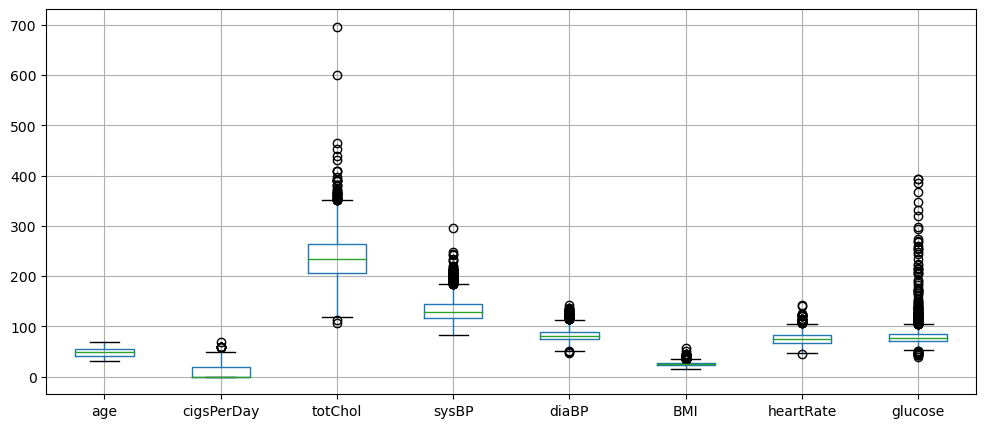

In [16]:
# Visualisation de la répartition des variables quantitatives à l'aide de boxplots.

plt.figure(figsize = (12,5))
df[continuous_col].boxplot();

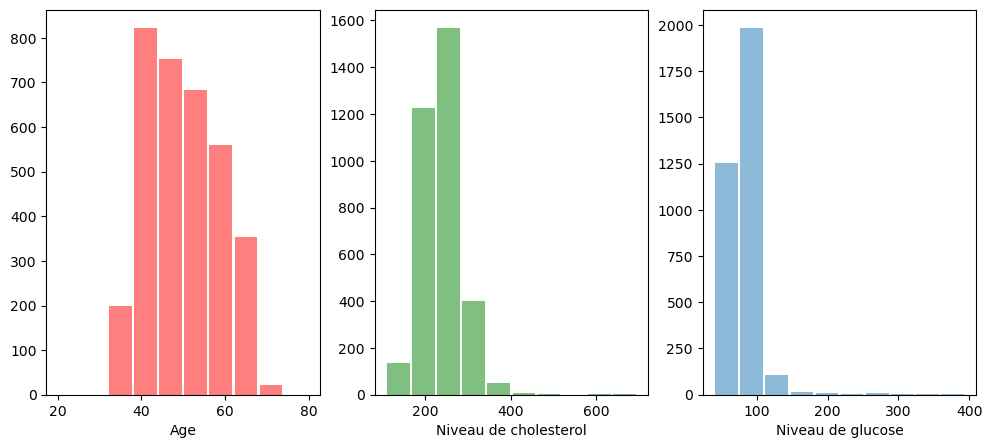

In [17]:
# Visualisation de la répartition de trois varaibles à l'aide d'histogrammes.

plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
plt.hist(df['age'],range = (20,80), bins = 10, rwidth = 0.9, color = 'red', alpha = 0.5)
plt.xlabel('Age')

plt.subplot(1,3,2)
plt.hist(df['totChol'],bins = 10, rwidth = 0.9, color = 'green', alpha = 0.5)
plt.xlabel('Niveau de cholesterol')

plt.subplot(1,3,3)
plt.hist(df['glucose'], bins = 10, rwidth = 0.9, alpha = 0.5)
plt.xlabel('Niveau de glucose');

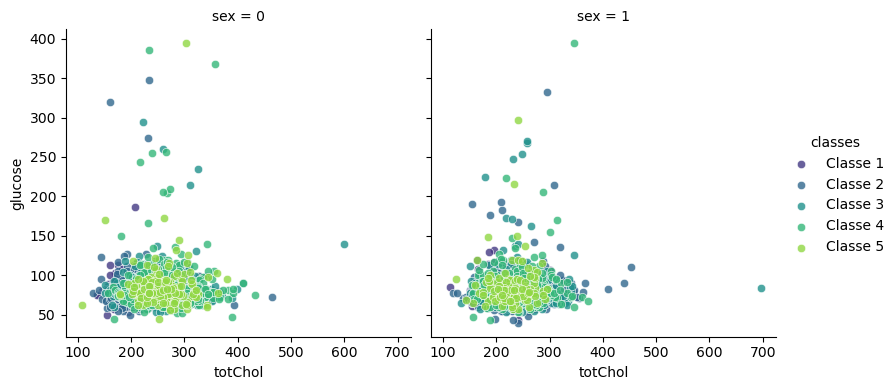

In [18]:
# Création de 5 classes d'âge avec la fonction cut et visualisation de la relation entre
# les deux variables continues "glucose" et "totchol" en fonction du sexe et de la classe d'âge.

df['classes'] = pd.cut(df['age'], bins=5, labels=['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4','Classe 5'])

g = sns.FacetGrid(df, col="sex", hue="classes", height = 4, palette = 'viridis')
g.map(sns.scatterplot, "totChol", "glucose", alpha=.8)
g.add_legend();

In [19]:
# Suppression de la colonne 'classe' pour la suite de l'étude :

df = df.drop('classes', axis=1)

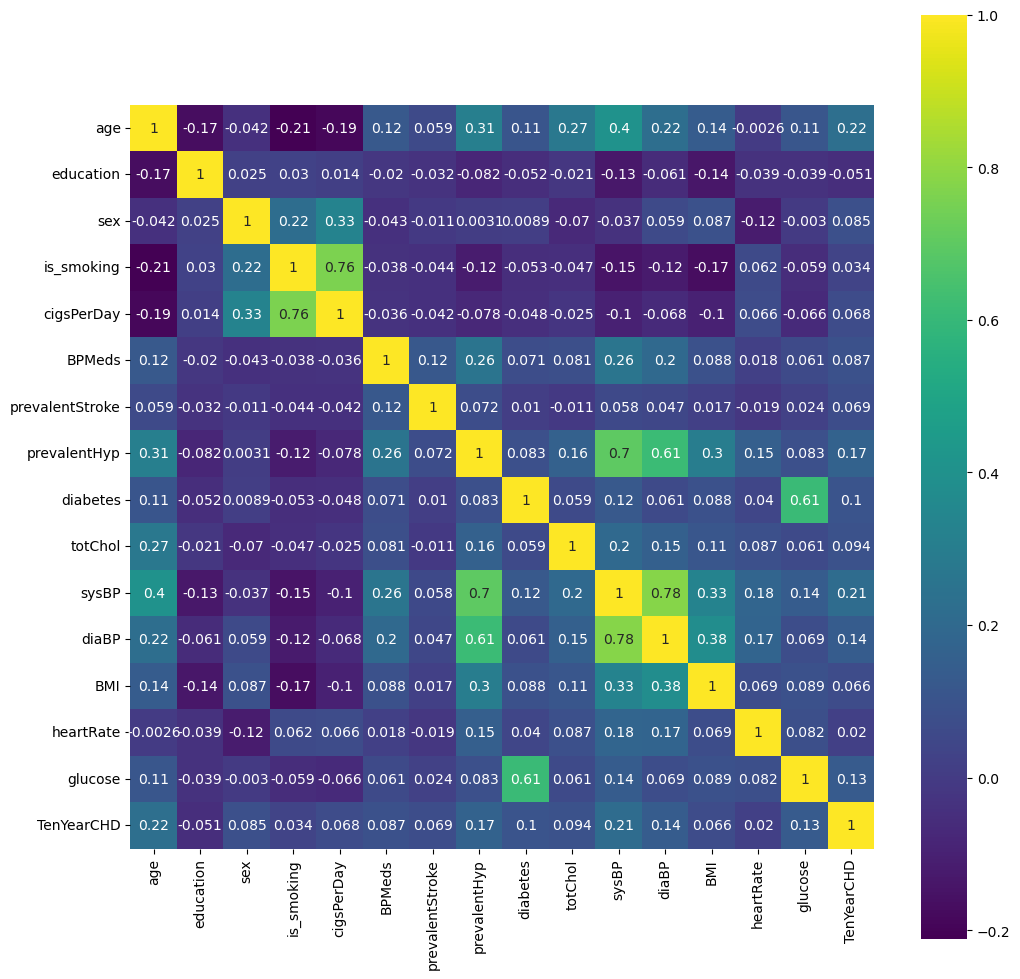

In [20]:
# Heatmap des corrélations entre les différentes variables du dataframe :

plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), square=True, annot=True, cmap="viridis");

# On remarquera que, par rapport à la variable cible 'TenYearCHD', les variables les plus corrélées sont
# 'sysBP', 'age' et 'prevalentHyp'.

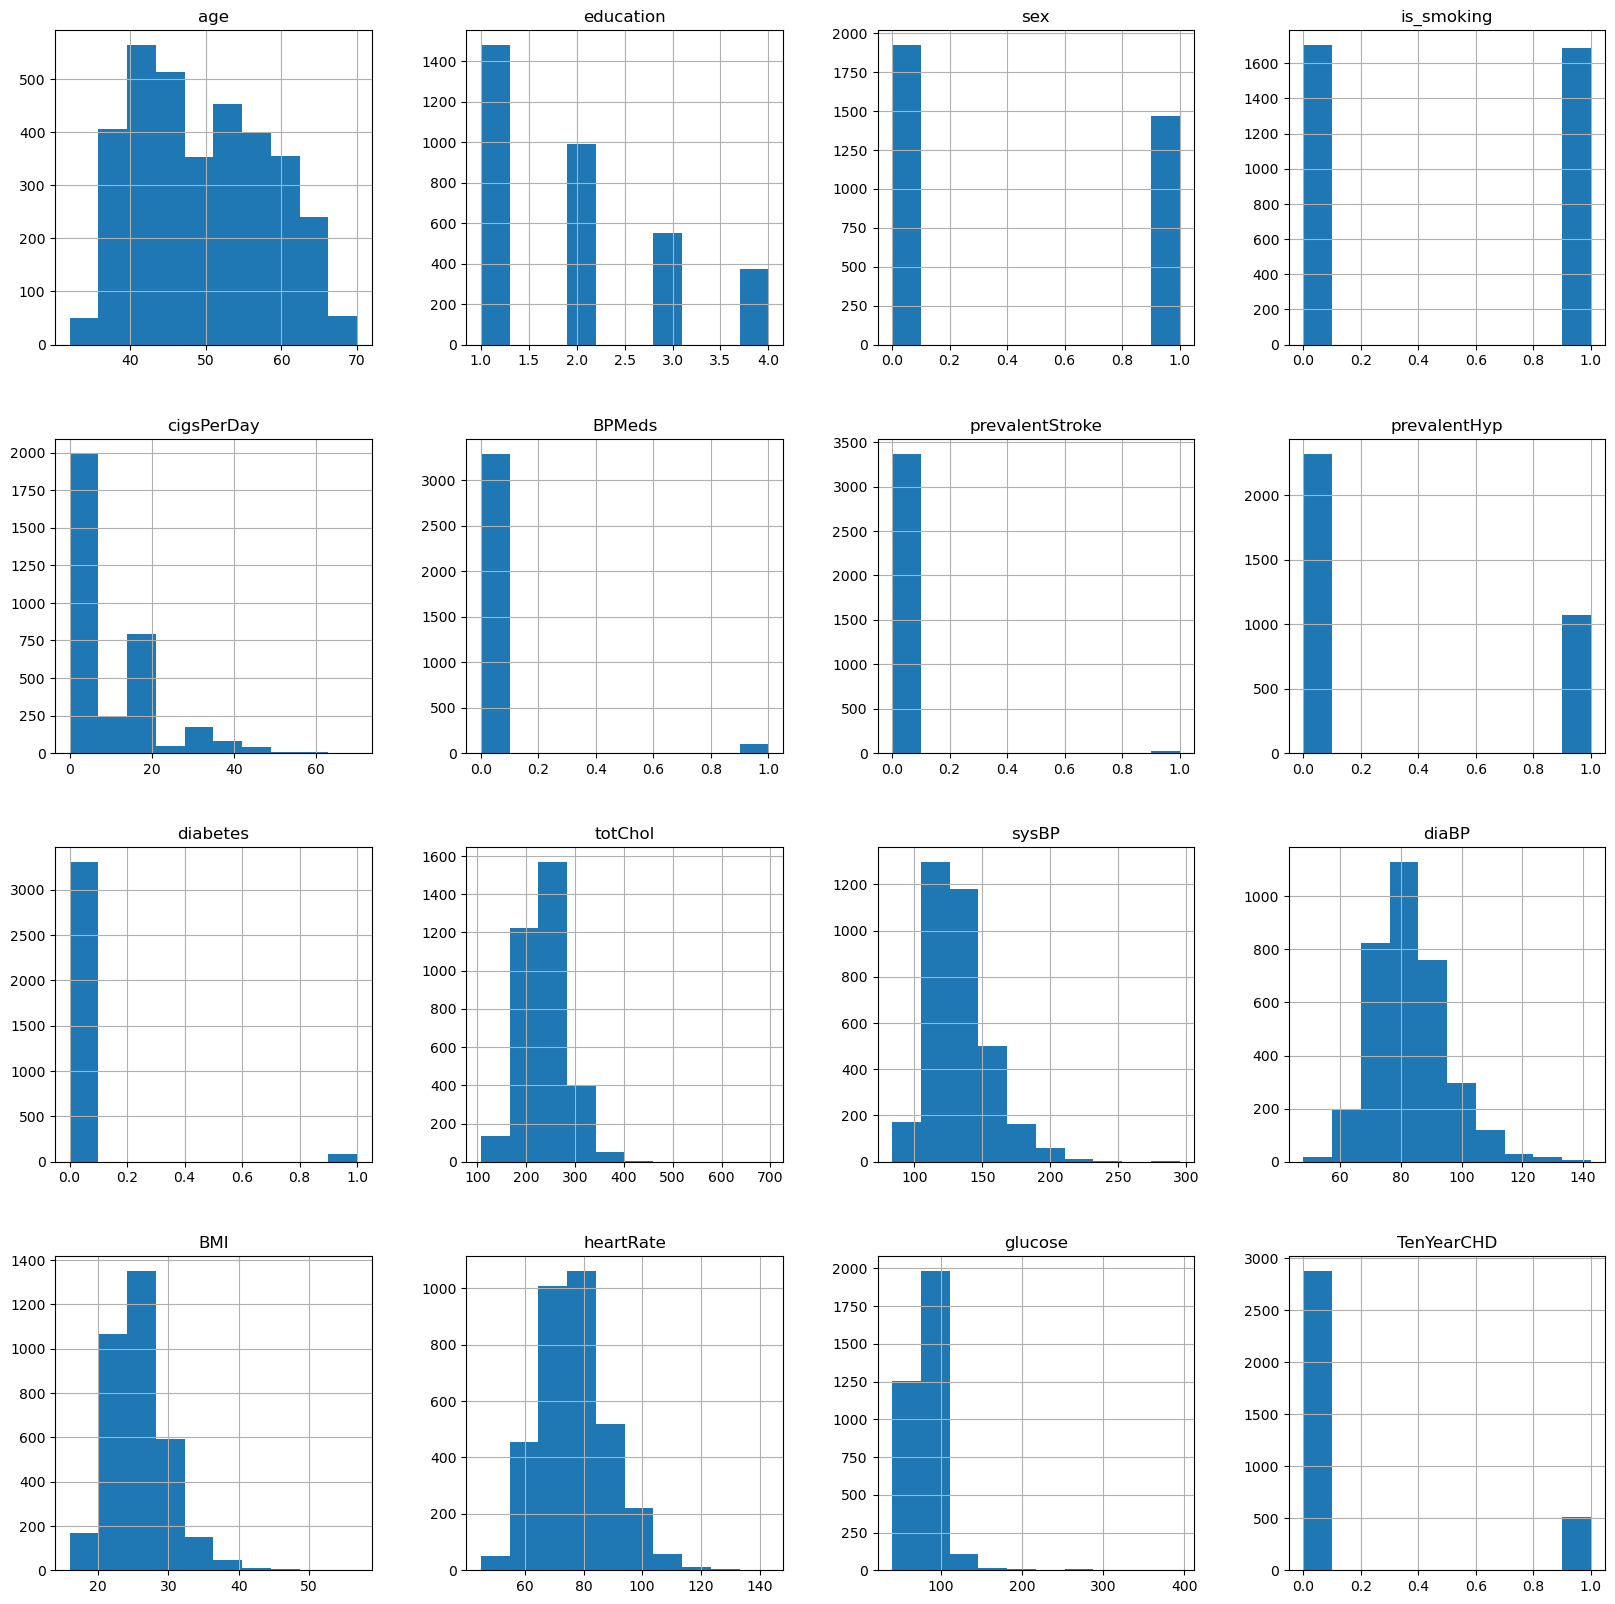

In [21]:
# Répartition des variables du dataframe à l'aide d'histogrammes. Les variables catégorielles sont bien identifiables.

df.hist(figsize = (20,20));

Split

In [22]:
from sklearn.model_selection import train_test_split

features = pd.get_dummies(df, columns=df.select_dtypes(exclude=['int64', 'float64']).columns)
features = features.drop('TenYearCHD', axis=1)
X = features
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

## 2e partie - classification

Algorithme LinearSVC

In [23]:
# Import du modéle et création d'un estimateur avec hyperparamètres par défaut.

from sklearn.svm import LinearSVC
Linear = LinearSVC()

# Entrainement du modèle et affichage du score.

Linear.fit(X_train,y_train)
print('Score :',Linear.score(X_test, y_test))

Score : 0.15339233038348082


In [24]:
# Liste des hyperparamètres :

Linear.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [25]:
# Recherche des meilleurs paramètres avec la fonction GridSearchCV :

from sklearn.model_selection import GridSearchCV

parametres = {'C':[0.1,1,10,50], 'max_iter':[1000,5000,10000,50000]}
grid_clf = GridSearchCV(estimator=Linear, param_grid=parametres)
grille = grid_clf.fit(X_train,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])
print('Le modèle qui fournit la meilleur prédiction a pour paramètres :',grid_clf.best_params_)

                           params  mean_test_score
0    {'C': 0.1, 'max_iter': 1000}         0.571091
1    {'C': 0.1, 'max_iter': 5000}         0.853097
2   {'C': 0.1, 'max_iter': 10000}         0.739233
3   {'C': 0.1, 'max_iter': 50000}         0.854277
4      {'C': 1, 'max_iter': 1000}         0.712684
5      {'C': 1, 'max_iter': 5000}         0.852507
6     {'C': 1, 'max_iter': 10000}         0.713274
7     {'C': 1, 'max_iter': 50000}         0.713274
8     {'C': 10, 'max_iter': 1000}         0.712684
9     {'C': 10, 'max_iter': 5000}         0.572271
10   {'C': 10, 'max_iter': 10000}         0.852507
11   {'C': 10, 'max_iter': 50000}         0.853097
12    {'C': 50, 'max_iter': 1000}         0.711504
13    {'C': 50, 'max_iter': 5000}         0.569912
14   {'C': 50, 'max_iter': 10000}         0.853097
15   {'C': 50, 'max_iter': 50000}         0.852507
Le modèle qui fournit la meilleur prédiction a pour paramètres : {'C': 0.1, 'max_iter': 50000}


In [26]:
# Optimisation du modèle avec les meilleurs paramètres et entrainement :

Linear = LinearSVC(C=0.1, max_iter=50000)
Linear.fit(X_train, y_train)


LinearSVC(C=0.1, max_iter=50000)

In [30]:
# Affichage du score du modèle optimisé :

y_pred = Linear.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

print('Score :',Linear.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1435
           1       0.86      0.02      0.04       260

    accuracy                           0.85      1695
   macro avg       0.85      0.51      0.48      1695
weighted avg       0.85      0.85      0.78      1695

Score : 0.8495575221238938


In [29]:
# Matrice de confusion :

y_pred = Linear.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Le modèle LinearSVC, une fois optimisé, affiche un score de 85.0%. Il a cependant du mal à correctement
# identifier les vrais positifs.

Classe prédite,0,1
Classe réelle,,
0,1434,1
1,254,6


[ 135  271  406  542  678  813  949 1084 1220 1356]


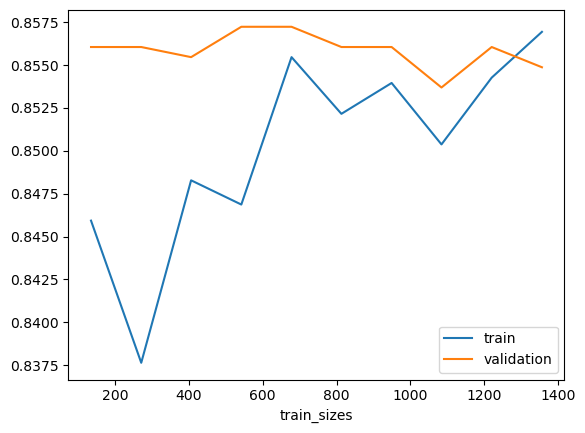

In [31]:
# Affichage de la courbe d'apprentissage :

from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(Linear, X_train, y_train, train_sizes = np.linspace(0.1,1,10),cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label='train')
plt.plot(N, val_score.mean(axis = 1), label='validation')
plt.xlabel('train_sizes')
plt.legend();

# Le graphe est un peu erratique !

K Neighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
KNC = KNeighborsClassifier()

KNC.fit(X_train,y_train)

print('Score :',KNC.score(X_test,y_test))

Score : 0.8395280235988201


In [34]:
y_pred = KNC.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,1399,36
1,236,24


In [35]:
KNC.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [36]:
parametres = {'n_neighbors':np.arange(1,30),'metric':['minkowski','euclidean','manhattan']}

grid = GridSearchCV(estimator=KNC, param_grid=parametres, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [37]:
grid.best_score_

0.855457227138643

In [38]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 25}

In [39]:
# Création d'un modèle avec les meilleurs hyperparamètres :

model = grid.best_estimator_

In [40]:
# Affichage du score :

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1435
           1       0.64      0.03      0.07       260

    accuracy                           0.85      1695
   macro avg       0.75      0.52      0.49      1695
weighted avg       0.82      0.85      0.79      1695



In [41]:
# Affichage de la matrice de confusion :

y_pred = model.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])


Classe prédite,0,1
Classe réelle,,
0,1430,5
1,251,9


[ 135  271  406  542  678  813  949 1084 1220 1356]


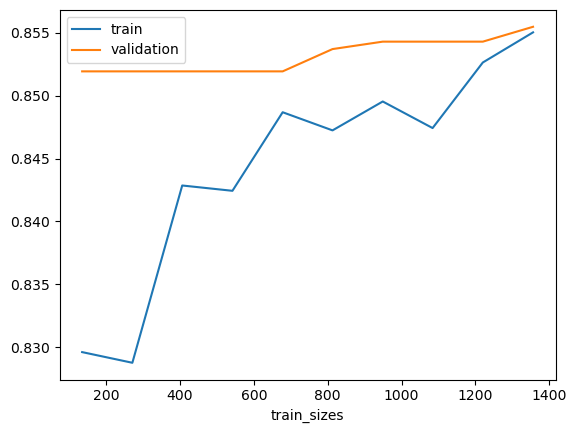

In [42]:
# Affichage de la courbe d'apprentissage

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1,1,10),cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label='train')
plt.plot(N, val_score.mean(axis = 1), label='validation')
plt.xlabel('train_sizes')
plt.legend();

# Le graphe indique une courbe d'apprentissage croissante qui laisse présager que des données supplémentaires
# permettraient de faire monter encore un peu le score du modèle.

SVC

In [43]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [44]:
print(svc.score(X_test, y_test))

0.8477876106194691


In [45]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
parametres = {'C':[1,10,50], 'kernel':['linear', 'rbf']}

grid_svc = GridSearchCV(estimator= svc, param_grid = parametres)
grille = grid_svc.fit(X_train,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])
print('Le modèle qui fournit la meilleur prédiction a pour paramètres :',grid_svc.best_params_)

                          params  mean_test_score
0   {'C': 1, 'kernel': 'linear'}         0.850737
1      {'C': 1, 'kernel': 'rbf'}         0.851917
2  {'C': 10, 'kernel': 'linear'}         0.854867
3     {'C': 10, 'kernel': 'rbf'}         0.853097
4  {'C': 50, 'kernel': 'linear'}         0.849558
5     {'C': 50, 'kernel': 'rbf'}         0.853687
Le modèle qui fournit la meilleur prédiction a pour paramètres : {'C': 10, 'kernel': 'linear'}


In [47]:
# Création du modèle avec les meilleurs hyperparamètres et affichage du score :

svc = SVC(C=10, kernel='linear')
svc.fit(X_train,y_train)


y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1435
           1       0.67      0.05      0.09       260

    accuracy                           0.85      1695
   macro avg       0.76      0.52      0.50      1695
weighted avg       0.82      0.85      0.79      1695



In [48]:
# Affichage de la matrice de confusion :

y_pred = svc.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Le modèle ne semble pas très bon malgré un score de 85% : il a du mal à prédire les vrais positifs.

Classe prédite,0,1
Classe réelle,,
0,1429,6
1,248,12


[ 135  271  406  542  678  813  949 1084 1220 1356]


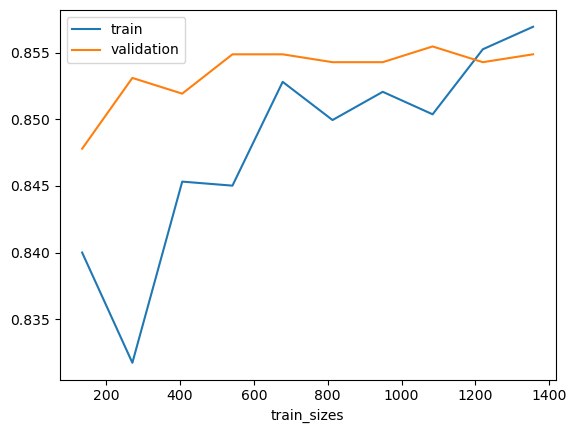

In [49]:
# Affichage de la courbe d'apprentissage :

N, train_score, val_score = learning_curve(svc, X_train, y_train, train_sizes = np.linspace(0.1,1,10),cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label='train')
plt.plot(N, val_score.mean(axis = 1), label='validation')
plt.xlabel('train_sizes')
plt.legend();

# Ici aussi, la courbe a une tendance haussière, ce qui semble indiquer que le modèle pourrait obtenir
# un score plus élevé avec des données supplémentaires.

Random Forest Classifier

In [52]:
clf = ensemble.RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
print(clf.score(X_test,y_test))

0.8471976401179941


In [54]:
parametres = {'min_samples_split':list(range(2, 32, 2))}

grid_clf = GridSearchCV(estimator = clf, param_grid = parametres)

grille = grid_clf.fit(X_train,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params', 'mean_test_score']])
print('Le modèle qui fournit la meilleur prédiction a pour paramètres :',grid_clf.best_params_)

                       params  mean_test_score
0    {'min_samples_split': 2}         0.851327
1    {'min_samples_split': 4}         0.854277
2    {'min_samples_split': 6}         0.852507
3    {'min_samples_split': 8}         0.851917
4   {'min_samples_split': 10}         0.852507
5   {'min_samples_split': 12}         0.854277
6   {'min_samples_split': 14}         0.852507
7   {'min_samples_split': 16}         0.855457
8   {'min_samples_split': 18}         0.854277
9   {'min_samples_split': 20}         0.851327
10  {'min_samples_split': 22}         0.853097
11  {'min_samples_split': 24}         0.852507
12  {'min_samples_split': 26}         0.854867
13  {'min_samples_split': 28}         0.851917
14  {'min_samples_split': 30}         0.854277
Le modèle qui fournit la meilleur prédiction a pour paramètres : {'min_samples_split': 16}


In [55]:
# Création d'un modèle avec les meilleurs hyperparamètres et affichage de la matrice de confusion :

clf = ensemble.RandomForestClassifier(min_samples_split=16)
clf.fit(X_train, y_train)

y_pred = grid_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,1429,6
1,247,13


In [56]:
# Affichage du score : 

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1435
           1       0.73      0.06      0.11       260

    accuracy                           0.85      1695
   macro avg       0.79      0.53      0.52      1695
weighted avg       0.83      0.85      0.80      1695



[ 135  271  406  542  678  813  949 1084 1220 1356]


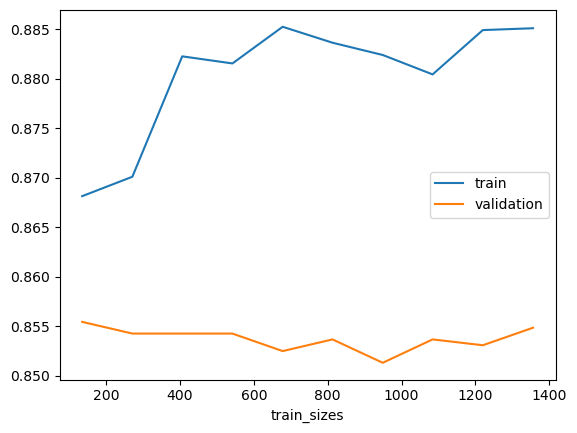

In [57]:
N, train_score, val_score = learning_curve(clf, X_train, y_train, train_sizes = np.linspace(0.1,1,10),cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label='train')
plt.plot(N, val_score.mean(axis = 1), label='validation')
plt.xlabel('train_sizes')
plt.legend();

## 3e partie - conclusion

Cette étude est mise en application de quelques unes des méthodologies apprises en cours de formation.

Principaux points à approfondir : 
- mieux connaîtres les différents hyperparamètres des algorithmes utilisés
- utiliser des métriques plus pertinentes pour mieux comparer les différents modèles
- utiliser, peut-être, des datasets contenant plus de données afin d'obtenir des courbes
  d'apprentissage plus fournies, pour une meilleure interprétation.